Looking at the night sky, the pattern of stars on the surface of the sky follows a familiar pattern. The Big Dipper, Cassiopeia, the Pleiades, or Orion are popular landmarks in the sky which we can immediatly recognize. 

Different civilisations labelled these patterns using names such as constellations in the western world. However, this pattern is often the result of pure chance. Stars from one constellation belong often to remote areas in the universe and they bear this familiarity only because we always saw them as such; the rate at which stars move is much shorter than the lifespan of humanity.

I am curious here to study the density of stars as they appear on the surface of the sky. It is both a simple question yet a complex to formulate. Is there any generic principle that could be used to characterize their distribution? This is my attempt to answer the question 

https://astronomy.stackexchange.com/questions/43147/density-of-stars-on-the-surface-of-the-sky

(but also to make the formulation of the question clearer...). This is my answer:
<!-- TEASER_END -->

----
Building on the answers from @anders-sandberg and @ProfRob I think I get an answer for my own question. I am most certainly reinventing the wheel, but it has been fun. Please comment if you know any pointer on a similar derivation.

As a (very) rough approximation, one may assume that in a given line of sight, there is locally a uniform, independent and identically distributed density of stars. This can be modeled for instance by a [3D Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). A 3D Poisson distribution consists in drawing random positions in space independently for the 3 axis and independently for the different points.

As a consequence, there are stars in all directions, but they have different luminances due to their distance it is easy to derive the probability distribution of the distance and by a change of variable, one can find that of luminance as :

$$
\text{Pr}(L) \propto \frac 1 {d^{\frac 5 2}}
$$

This is what you get with a simple simulation by placing stars at random positions in the universe but also if you plot the distribution of the luminance for stars drawn from [a catalog of more than 100k stars][2] (left panel):

![result](https://laurentperrinet.github.io/sciblog/files/2021-03-27_generative.png)

But it is also a way to build a very simple model for generating images of the night sky (right panel).

PS: the other part of my question (can such a model be used to fit the density of stars in different areas of the sky?) will be for another time...
PS2: I have not talked about [Olbers' paradox](https://en.wikipedia.org/wiki/Olbers%27_paradox), while this may be related, in particular now that I read about the literature pointed in the [brightness section](https://en.wikipedia.org/wiki/Olbers%27_paradox#Brightness)...

---

The main assumption is that in the model we will formulate, there is no structure and the position of stars is drawn completely at random. Comparing the resulting night sky for this model to that observed from earth, we will perhaps learn more about the balance between structure (Milky way, clusters, ...) and what is more characteristic of a noisy arrangment of matter.

In the end of this notebook, we should be able to generate images like which captures pretty well what you could observe in the sky during a clear night such that we will conclude that much of this familiar structure is just the result of some random process that once rolled the dice to place the stars at the positions at which they are.

A further note: This post is a jupyter notebook accumulating my researchs on the topic. It is merely my personal notes and serves for my future self - I share this material becaause of it origniates from similar posts. It is not a straight line, I will digress and make errors, making the narrative longer than the usual "3 minutes attention span" for a blog post. Congratulations you already achieved to read beyond this point.

Let's first initialize the notebook:

In [1]:
#### from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 15
figsize = (fig_width, fig_width/phi)
%load_ext autoreload
%autoreload 2

# 3D Poisson noise

Let's first the most neutral way of placing stars at random in a infinite, Euclidean space. No relativity, no time, no fuss, just to simplify things. Another assumption: We will consider that all light sources on the night sky will be point sources. This assumption is justified if we consider the size of stellar objects compared to their distance. Quite fair as you need an educated eye to know that at the position of [M31](https://en.wikipedia.org/wiki/Andromeda_Galaxy), there is more than a point of light but the whole Andromeda galaxy. More on this latter, notably on the fact that brighter stars appear visually bigger.

While these assumptions seem reasonable, we will assume a further hypothesis for the placements of stars in space: There is *on average* a uniform density of star per unit of volume. That is, per cube of space, there will be a stationary number of stars. 

The most neutral way of drawing independent and identically distributed density of stars per cube in space. This can be modeled for instance by a [3D Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). A 3D Poisson distribution consists in drawing random positions in space independently for the 3 axis and independently for the different points.  

## 1D Poisson noise

Let's set the limits of the "1D box" (a segment) to 0 and 1 and draw one hundred positions:

In [2]:
np.random.seed(2001) # a space odyssey
N_stars = 100
pos = np.random.uniform(size=(N_stars))

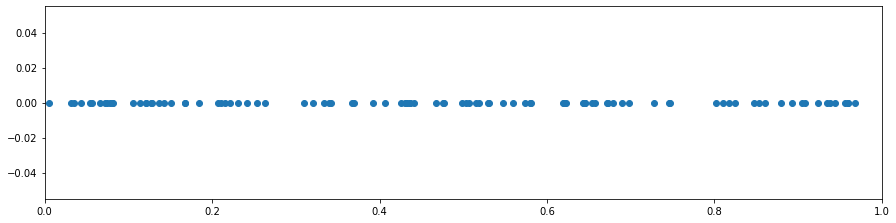

In [3]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**3))
ax.scatter(pos, np.zeros_like(pos))
ax.set_xlim(0, 1);

Simple, isn't it? It is in fact rather difficult to find anything simpler: each position is uniformly distributed in the segment, and each other dot is drawn independentlty from the other such that the population density if also flat.

Still, you can notice that some dots are clustered. Yet this is a perceptual effect as there is no cluster in the generative model; dots are independently drawn. This is a known [psychological phenomenon](https://core.ac.uk/download/pdf/82644986.pdf).

## 2D Poisson noise

We can repeat the same process in 2D:

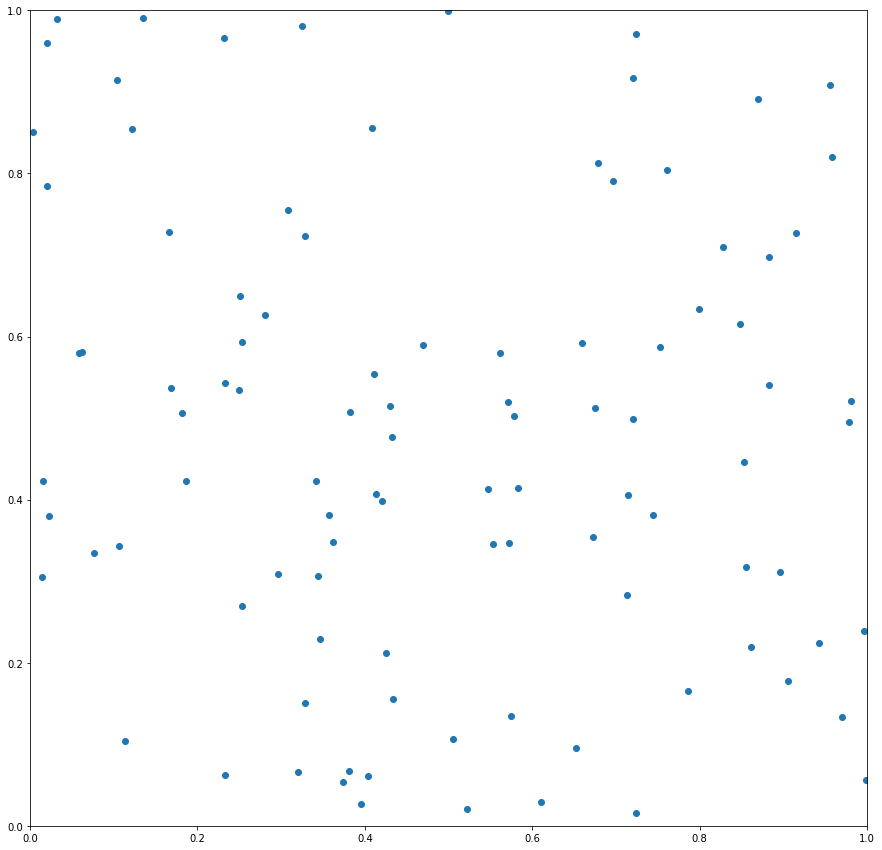

In [4]:
pos = np.random.uniform(size=(2, N_stars))
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.scatter(pos[0, :], pos[1, :])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1);

## 3D Poisson noise

Let's continue in 3D (just the [visualization gets different](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)) - such that we get a 3D Poisson noise:


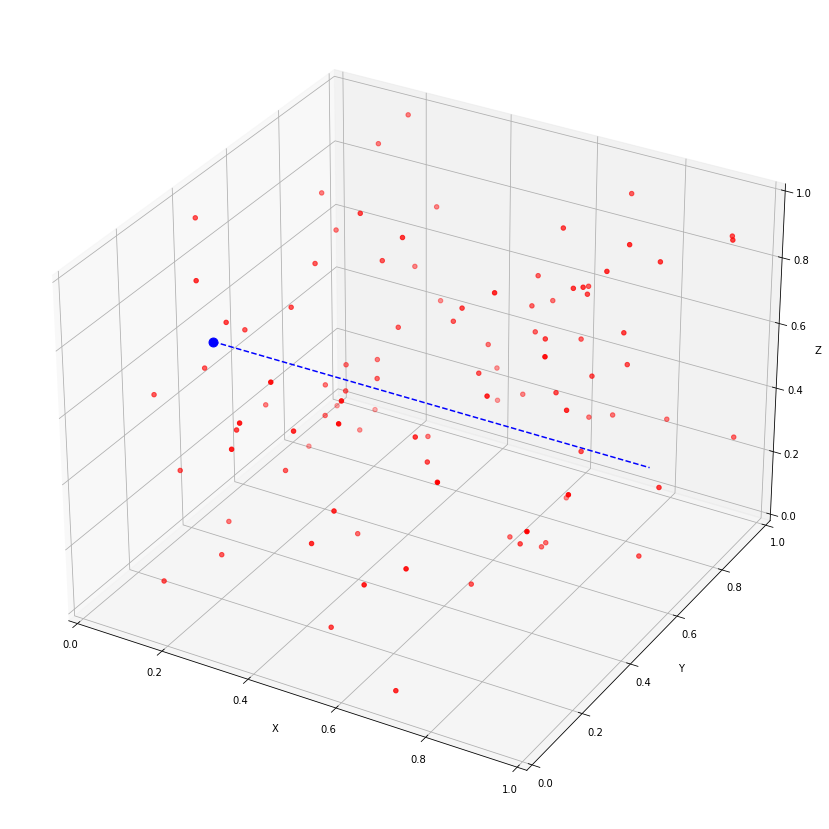

In [5]:
pos = np.random.uniform(size=(3, N_stars))
fig, ax = plt.subplots(figsize=(fig_width, fig_width), subplot_kw=dict(projection='3d'))
ax.scatter(pos[0, :], pos[1, :], pos[2, :], s=20, c='r')
ax.scatter([0], [.5], [.5], s=80, c='b')
ax.plot([0, 1], [.5, .5], [.5, .5], c='b', ls='--')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

The big blue dot would represent a point of observation (the earth!) from which we would see these stars and the dashed line a line of sight. 

Imagine that you would travel along this line with a constant velocity, this is what you would see:

![star flow](https://raw.githubusercontent.com/NaturalPatterns/StarField/master/starfield.gif)

(more on this in https://github.com/NaturalPatterns/StarField). This generative model seems like a rough but good model for the placement of stars in the universe: at random, independently drawn.

# Mathematical modeling of stars on the celestial sphere

## projecting absolute coordinates to azimuth and elevation

Let's use the dashed line defined above as the line of sight - giving the depth in our resulting image.
Knowing the position of the observer (let's say $(x, y, z) = (0, 0 , 0)$) and that of stars relative to it, one can compute the azimuth $a$ and elevation $e$ as:

$$
a = \arctan \frac z x \\
e = \arctan \frac y x
$$

We will supose that we look at a fairly small area in the sky, such that the volume we look at looks in cross-section to:

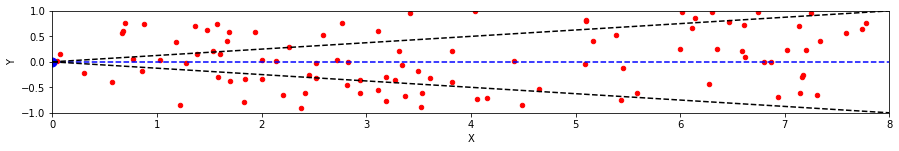

In [6]:
pos = np.random.uniform(size=(3, N_stars))
depth = 8
pos[0, :] *= depth
pos[1, :] = (pos[1, :]-.5)*2
pos[2, :] = (pos[2, :]-.5)*2

fig, ax = plt.subplots(figsize=(fig_width, fig_width/depth))
ax.scatter(pos[0, :], pos[1, :], s=20, c='r')
ax.scatter([0], [0], s=80, c='b')
ax.plot([0, depth], [0, 0], c='b', ls='--')
ax.plot([0, depth], [0, -1.], c='k', ls='--')
ax.plot([0, depth], [0, 1.], c='k', ls='--')
ax.set_xlim(0, depth)
ax.set_ylim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y');

We deduce that the span of visual angle we look at is limited to an angle of:

In [7]:
angle_max = np.arctan2(1, depth)
print(f'FOV = {2*angle_max*180/np.pi:.3f} deg')

FOV = 14.250 deg


In particular, I personnaly use an [evScope](https://unistellaroptics.com/) with that sensor:

* Sensor Technology: Sony Exmor with NIR technology Sensor Model IMX224
* Sensor: 1/3” CMOS IMX224/IMX225
* Resolution: 1.2Mega Pixels 1304X976
* Pixel Size: 3.75µm
* Sensor Size: 4.8mm*3.6mm
* Diagonal: 6.09mm
* Exposure Rage: 32µs-1000s

With a length of 450 mm, an aperture of 4.5 inches (11.4 cm), we get a similar field of view:

In [8]:
print(f'FOV = {2*np.arctan2(11.4/2, 45)*180/np.pi:.3f} deg')

FOV = 14.438 deg


Let's return to our model and compute azimuth and elevation for each point:

In [9]:
az = np.arctan2(pos[1, :], pos[0, :])
el = np.arctan2(pos[2, :], pos[0, :])

such that we may make some computations, for instance that we will not see the stars out of the field of view:

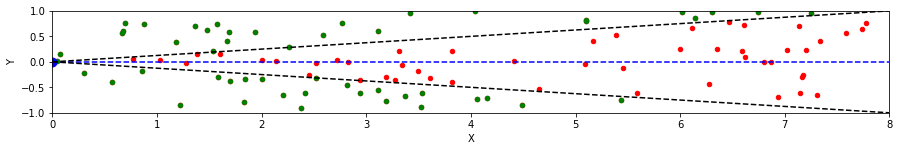

In [10]:
ind_out = np.maximum(np.abs(az), np.abs(el)) > angle_max # this is the right filter in 3D
ind_out = np.abs(az) > angle_max # that's the filter in 2D for the azimuth only

fig, ax = plt.subplots(figsize=(fig_width, fig_width/depth))
ax.scatter(pos[0, :], pos[1, :], s=20, c='r')
ax.scatter(pos[0, ind_out], pos[1, ind_out], s=20, c='g')
ax.scatter([0], [0], s=80, c='b')
ax.plot([0, depth], [0, 0], c='b', ls='--')
ax.plot([0, depth], [0, -1.], c='k', ls='--')
ax.plot([0, depth], [0, 1.], c='k', ls='--')
ax.set_xlim(0, depth)
ax.set_ylim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y');

The stars in these new coordinates look like this:

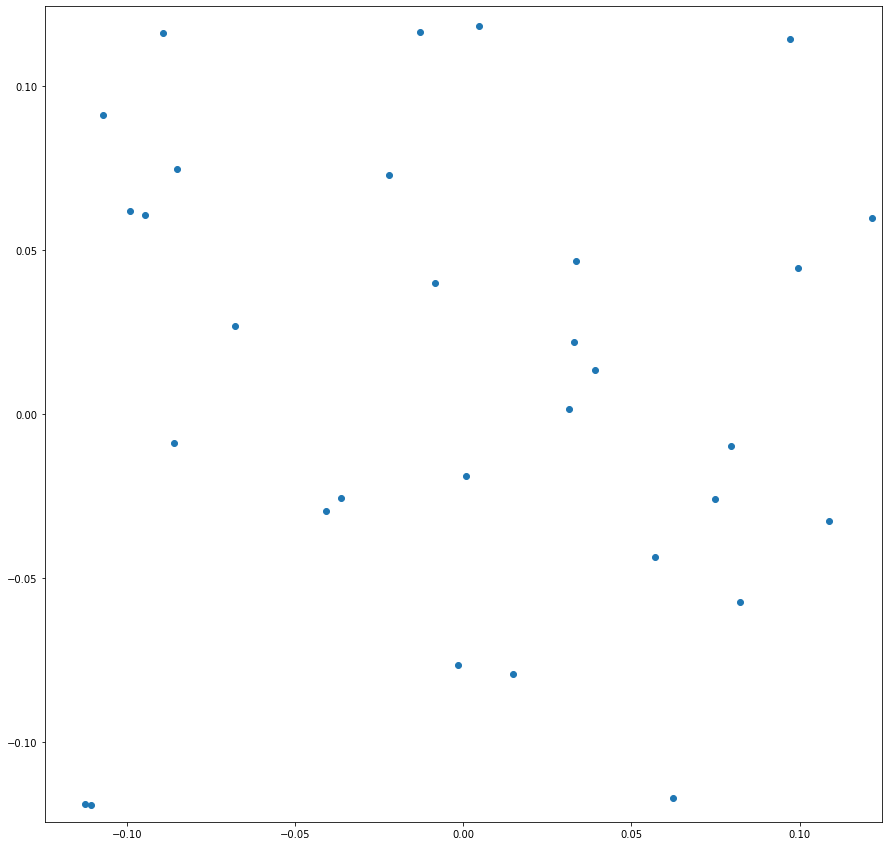

In [11]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.scatter(az, el)
ax.set_xlim(-angle_max, angle_max)
ax.set_ylim(-angle_max, angle_max);

which looks like a new 2D Poisson noise.... 

In fact, this is expected and results from the way we have drawn the positions: independently. We may as well have drawn the azimuth and elevation randomly! This section allowed us to make fun plots but a little of mathematical insight would have permitted to make a shortcut... Anyway.

As a summary, from these simulations, we learn that if we draw points at random in an infinite universe, the dots' positions are distributed at random on the celestial sphere.

## distance
Let's continue, as we also have a value for the distance:

$$
d = \sqrt{ x^2 + y^2 + z^2} 
$$

From the conservation law for the luminous energy (which travels straight in an Euclidian space here), the luminance of a star falls off as inversely proportional to the square of the distance $d$:

$$
L \propto \frac 1 {d^2}
$$

such that we might modulate the intensity of the star inversely proportionnally to its distance :

ValueError: s must be a scalar, or the same size as x and y

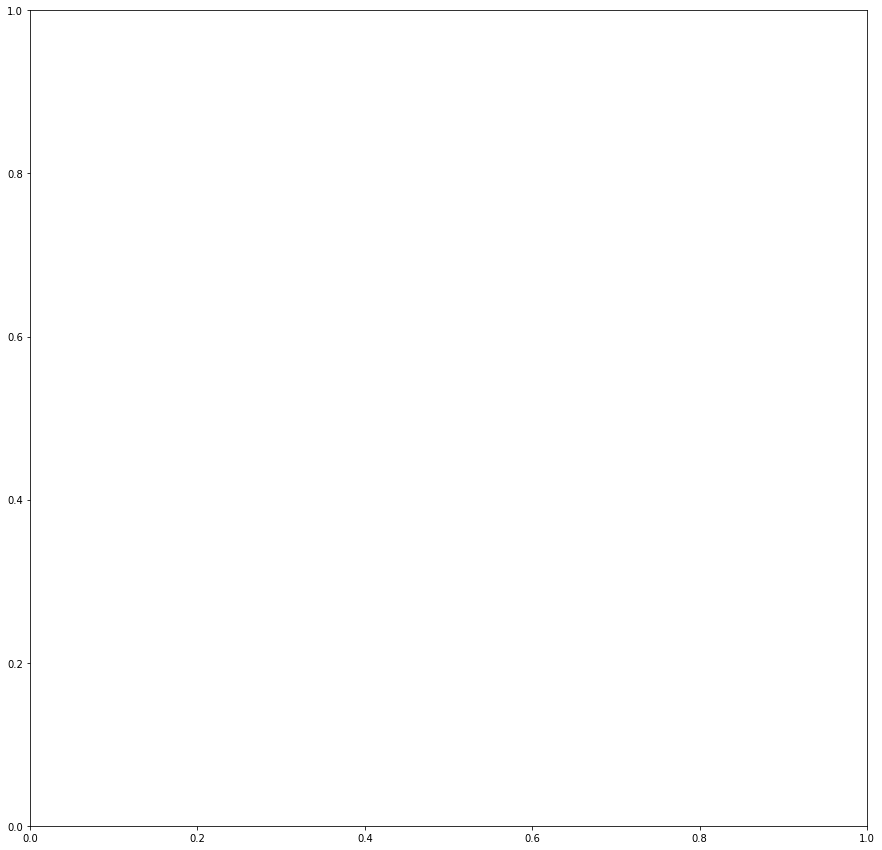

In [60]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
d = np.sqrt((pos**2).sum(axis=0))

ax.scatter(az, el, s=20 * d.max()**2/d**2)#, c=O3)
ax.set_xlim(-angle_max, angle_max)
ax.set_ylim(-angle_max, angle_max);

This looks more natural... and very close to the image I picked at random from stellarium:

![stellarium](https://i.stack.imgur.com/EQwxT.jpg)

This dependance on the apparent luminosity of stars as a function of distance is pretty straightfoward: considering the star as a point-like source radiating photons uniformly in all directions, the energy emitted after time $t$ gets concentrated on the sphere of radius $d = c\cdot t$, with $c$ the celerity of light. The surface of this sphere is thus $4 \cdot \pi d^2$ which conserves its total energy. As a consequence, the apparent energy of a star is [inversely proportional to the squared distance](https://en.wikipedia.org/wiki/Inverse-square_law).


## distribution of energies

let's now imagine that we are in the center of a huge ball of space with 10 billion stars. Let's furthermore estimate the distances:

In [13]:
N_stars = 1000 * 1000  * 10
pos = np.random.uniform(size=(3, N_stars))
pos[0, :] = (pos[0, :]-.5)*2
pos[1, :] = (pos[1, :]-.5)*2
pos[2, :] = (pos[2, :]-.5)*2
d = np.sqrt((pos**2).sum(axis=0))

to correct for possible artefact, we remove dots outside the sphere centered on the observer (this has very little effect on the results):

In [13]:
ind_ball = d < 1 

We deduce in this model the distribution for the luminances:

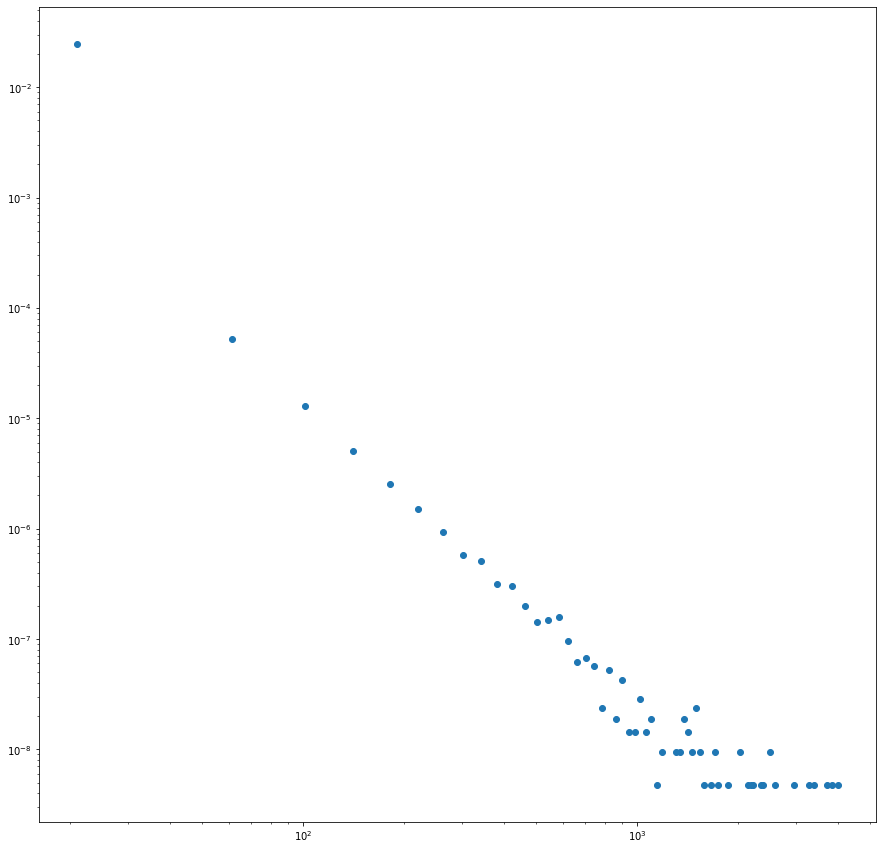

In [14]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.set_xscale('log')
ax.set_yscale('log');

On this log-log plot it looks like a line: we have a [power-law](https://en.wikipedia.org/wiki/Power_law).

## a power-law with exponent *-5/2*

Let's prove that this probability density function is a power-law:

Let's first start with the distance $d$ with:
$$
d^2 = x^2 + y^2 + z^2
$$
Let's imagine a star at a uniform position in space. The probability of the density being less than $D$ is:
$$
Pr(d\leq D) = \frac 1 Z \frac 4 3 \pi D^3
$$
where $Z$ is a normalization constant. The probability density is therefore
$$
Pr(d) \propto d^2
$$
 
We have the luminance $L$ for any given point given by
$$
L = \frac 1 {d^2} = g(d)
$$
where $g$ is the monotonous transformation of variable. One can thus operate a [change of variable](https://en.wikipedia.org/wiki/Probability_density_function#Scalar_to_scalar) such that with $d=g^{-1}(L)$:
$$
Pr(L) = \frac d {dL} g^{-1}(L) \cdot Pr(g^{-1}(L))
$$
with $g^{-1}(L)= \frac 1 {\sqrt{L}}$ and $ \frac d {dL} (g^{-1}(I)) = - \frac 1 2  L^{-\frac 3 2}$. Since $Pr(d) \propto d^2$ and $d^2 = \frac 1 L$, we finally have:

$$
Pr(I) \propto  L^{-\frac 5 2}
$$

As a consequence, the probability density function for the intensity of a star follows a power-law with exponent $-\frac 5 2$. Let's verify this on the synthetic example:

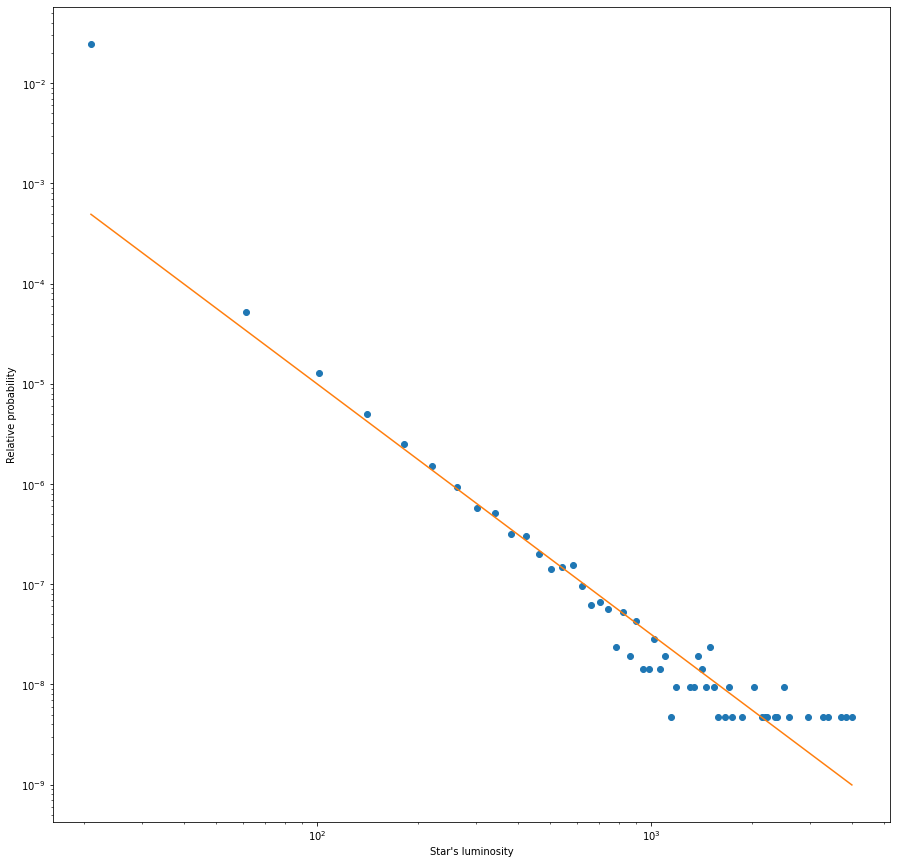

In [15]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, bin_centers**(-5/2), '-')
ax.set_xlabel("Star's luminosity")
ax.set_ylabel('Relative probability');
ax.set_xscale('log')
ax.set_yscale('log');

I do not even need to compute a statistical test to convince my eyes that the fit is excellent...

Note that this behaviour does not change much for other smooth distributions, like the normal distribution :

In [16]:
N_stars = 1000 * 1000  * 10
pos = np.random.normal(size=(3, N_stars))
d = np.sqrt((pos**2).sum(axis=0))

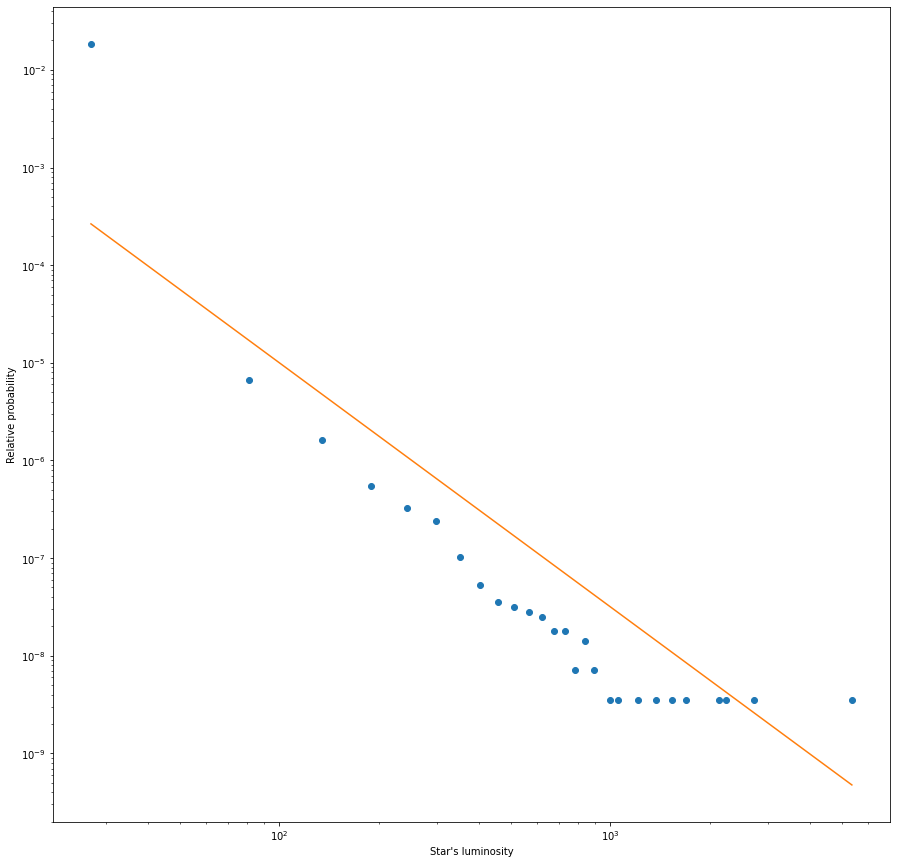

In [17]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, bin_centers**(-5/2), '-')
ax.set_xlabel("Star's luminosity")
ax.set_ylabel('Relative probability');
ax.set_xscale('log')
ax.set_yscale('log');

A last point to generalize this result. We assumed stars to be point-like sources with *the same emitting energy*. Obviously, this is not true: stars are more or less actively emitting - as characterized by their absolute brightness.

However, this law drawing this energy is *a priori* independent of the star and therefore on the law which induced the power law for the modulation of star brightness as a function of distance. As such, the power-law will still hold for a variety of star brightnesses.

Another note: this law shows that the distribution of the stars on the celestial sphere is a [self-similar](https://en.wikipedia.org/wiki/Self-similarity) [fractal](https://en.wikipedia.org/wiki/Fractal).

# stellar data


Ok, we made a mathematical prediction and tested it on a synthetic model. But does it apply to real data?

## star catalogs


To check if this law would be observed in experimental data, we may use the interweb and this are some catalogs I have found:

* galaxies database:  http://ngcicproject.observers.org/library.htm
* THE COLLINDER CATALOG OF OPEN STAR CLUSTERS : https://www.cloudynights.com/articles/cat/articles/the-collinder-catalog-updated-r2467
* Obscure Globular Clusters of the Milky Way: https://www.astronomy-mall.com/Adventures.In.Deep.Space/obscure.htm -  Terzan 1 - True Color Image by Brad Walter:
hygdata_v3.csv 

![ Terzan 1 - True Color Image by Brad Walter](https://www.astronomy-mall.com/Adventures.In.Deep.Space/images/terzan1c.jpg)

For us, these other databases are of special interest:
* star distance http://leda.univ-lyon1.fr/a007/ -> directly as a CSV = http://leda.univ-lyon1.fr/fG.cgi?n=a007&c=o&of=1,leda,simbad&nra=l&o=&a=csv
* or directly this one of more than 100k objects: https://github.com/astronexus/HYG-Database which will be well enough for this blog post

Let's use [pandas](https://pandas.pydata.org/) to load directly the data in our notebook:

In [18]:
import pandas as pd
url = "https://github.com/astronexus/HYG-Database/raw/master/hygdata_v3.csv"
space = pd.read_csv(url)

In [19]:
space

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119609,119611,NaN,NaN,NaN,NN 4381,NaN,NaN,23.963895,38.629391,16.9492,...,NaN,NaN,NaN,1,119611,NaN,0.002200,NaN,NaN,NaN
119610,119612,NaN,NaN,NaN,NN 4385,NaN,NaN,23.996567,47.762093,16.7224,...,NaN,NaN,NaN,1,119612,NaN,0.000088,NaN,NaN,NaN
119611,119613,NaN,NaN,NaN,NN 4386,NaN,NaN,23.996218,-44.067905,18.5185,...,NaN,NaN,NaN,1,119613,NaN,0.002224,NaN,NaN,NaN
119612,119614,NaN,NaN,NaN,NN 4387,NaN,NaN,23.997386,-34.111986,12.8205,...,NaN,NaN,NaN,1,119614,NaN,0.001086,NaN,NaN,NaN


Note the first row is the sun (*our* sun).

In [20]:
space['dist'][1:]

1         219.7802
2          47.9616
3         442.4779
4         134.2282
5         257.7320
            ...   
119609     16.9492
119610     16.7224
119611     18.5185
119612     12.8205
119613      7.8003
Name: dist, Length: 119613, dtype: float64

So that one may obtain a density plot for the *log* of the distance as:

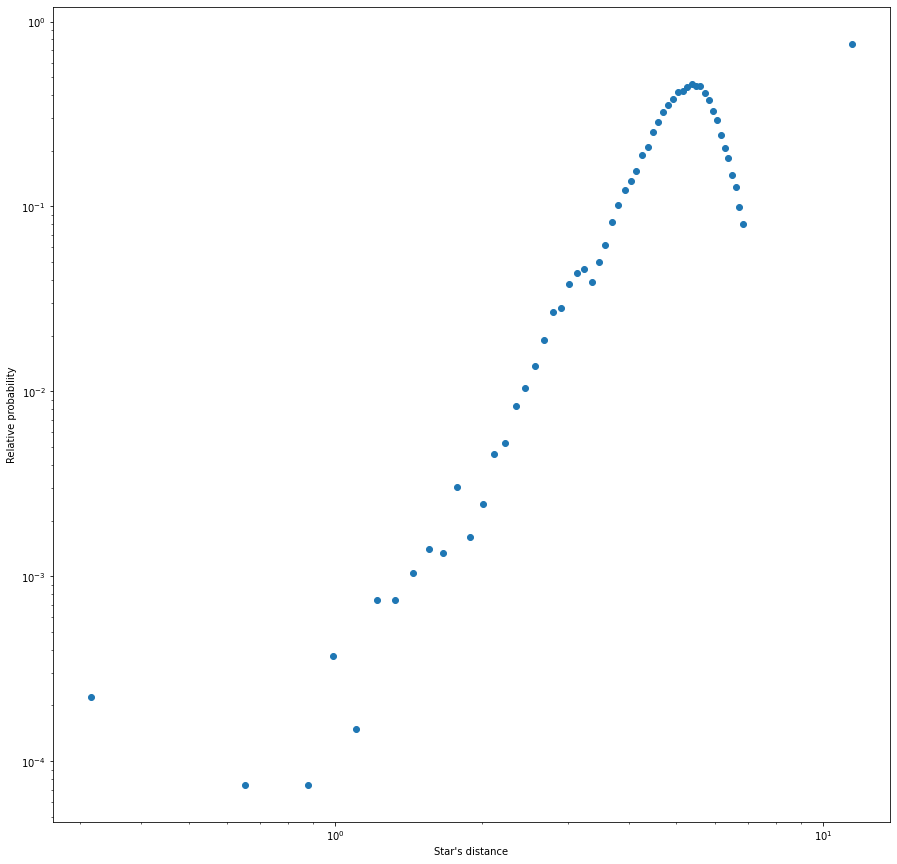

In [21]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(np.log(space['dist'][1:]), bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
#ax.plot(bin_centers, bin_centers**(-5/2), '-')
ax.set_xlabel("Star's distance")
ax.set_ylabel('Relative probability');
ax.set_xscale('log')
ax.set_yscale('log');

## distribution of luminances

Now... drum roll... will the data follow the same trend? I had a sweat *before* running the following cells:

In [22]:
space['lum']

0           1.000000
1           9.638290
2           0.392283
3         386.901132
4           9.366989
             ...    
119609      0.002200
119610      0.000088
119611      0.002224
119612      0.001086
119613      0.000319
Name: lum, Length: 119614, dtype: float64

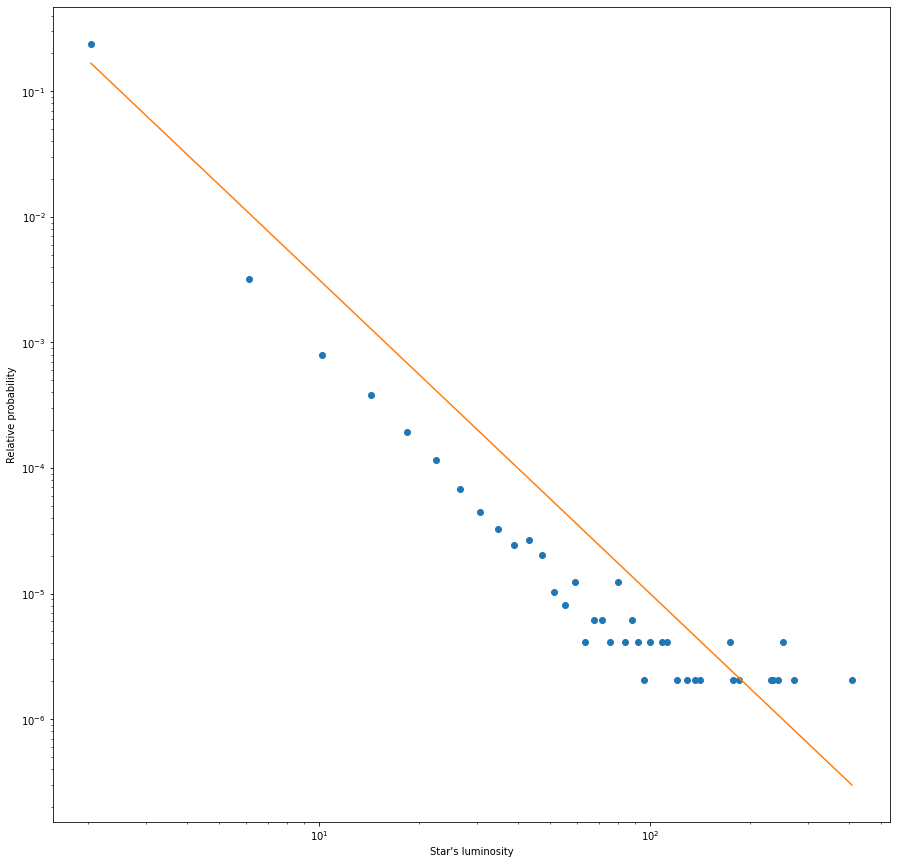

In [23]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
hist, bin_edges = np.histogram(space['lum']*1e-6, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, bin_centers**(-5/2), '-')
ax.set_xlabel("Star's luminosity")
ax.set_ylabel('Relative probability');
ax.set_xscale('log')
ax.set_yscale('log');

Wow. Data fits the model that we did *before* we fitted it to the data. This never happens in biology or any other field...

Putting the model and the data together (with some constants added to have the same order of units in both sets), we get a very good match between the model and the data: 

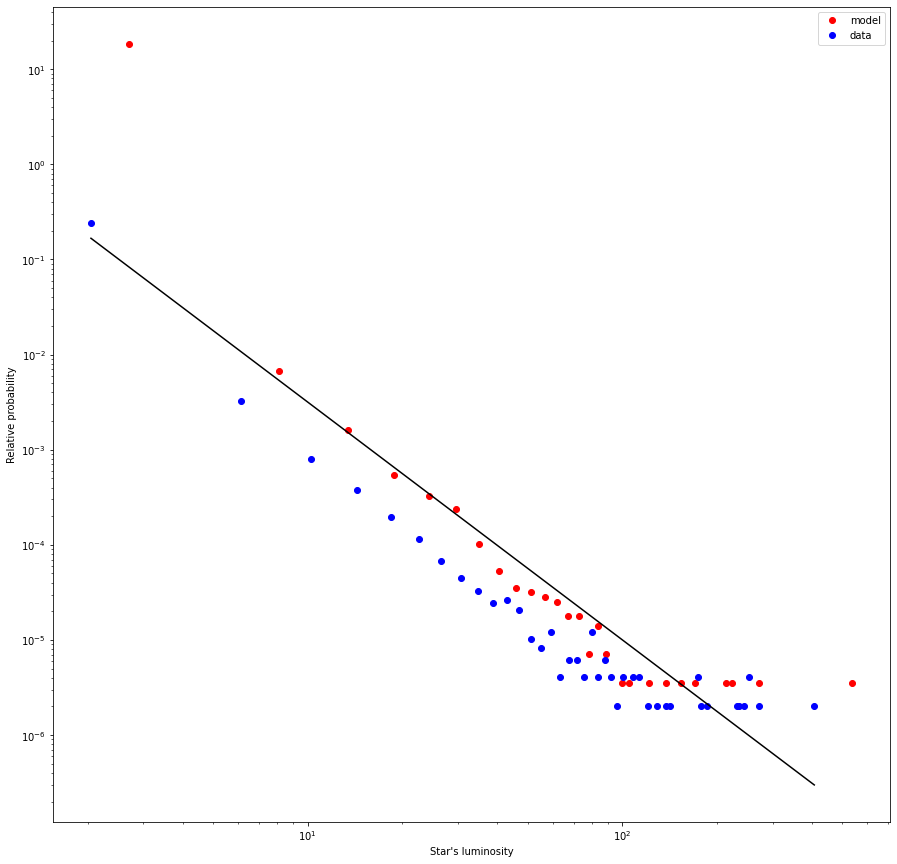

In [24]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
# model
hist, bin_edges = np.histogram(1e-1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, 100*hist, 'o', c='r', label='model')
# data
hist, bin_edges = np.histogram(space['lum'][1:]*1e-6, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o', c='b', label='data')
# fit
ax.plot(bin_centers, bin_centers**(-5/2), '-', c='k')
ax.set_xlabel("Star's luminosity")
ax.set_ylabel('Relative probability');
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best');

## todo: use that model to fit densities in the universe

what about the other part of my question (can such a model be used to fit the density of stars in different areas of the sky?) will be for another time...

## todo: Olber's paradox

I have not talked about [Olbers' paradox](https://en.wikipedia.org/wiki/Olbers%27_paradox), while this may be related, in particular now that I read about the literature pointed in the [brightness section](https://en.wikipedia.org/wiki/Olbers%27_paradox#Brightness)...

# image synthesis

Can we use this model to synthesize images of stars on the celestial sphere?

## forward model

The image of a single, point-like star is merely the impulse response of the optical apparatus (PSF) that images it. 

Astronomy images under this model may be produced by the combination of a single kernel (the PSF of the optics) with these sparse events. These sparse events are drawn as a 3D poisson noise and coefficients are drawn according to power-law described above. These will be convolved with a kernel defined using the [MotionClouds](https://github.com/NeuralEnsemble/MotionClouds) library. Let's illustrate that for the following image size:

In [25]:
N_X, N_Y = 2**10, 2**10

Let's draw coefficients according to a [Pareto law](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html):

In [26]:
scale, a = 2.e-3, 1.5

events = scale * np.random.pareto(a=a, size=(N_X, N_Y))

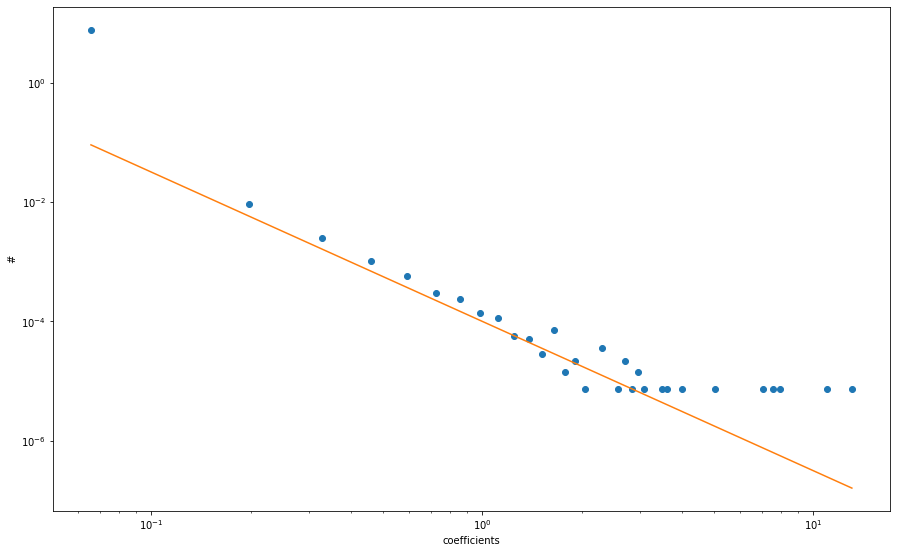

In [27]:
fig, ax = plt.subplots(figsize=figsize)
hist, bin_edges = np.histogram(events.ravel(), bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o')
ax.plot(bin_centers, 1e-4 * bin_centers**(-5/2), '-')

ax.set_xlabel('coefficients')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('#');

In [28]:
print('mean, std, max=', events.mean(), events.std(), events.max())

mean, std, max= 0.00392131679587419 0.03044310868454139 13.12712852878766


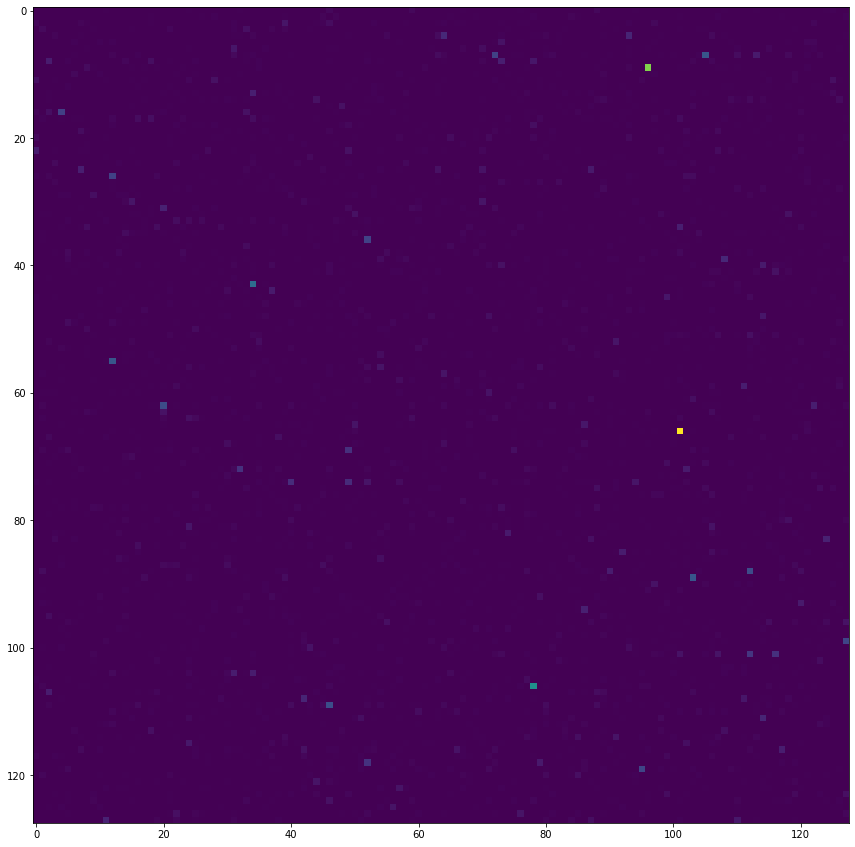

In [29]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(events[:128, :128], cmap=plt.viridis());

## kernel model

Let's now generate the image by convolving it with a kernel corresponding to the aperture of the telescope:

In [61]:
N_X, N_Y = 976, 1304

In [62]:
def star(N_X, N_Y, x_pos, y_pos, size_airy, theta, size_airy_ecc, intensity,
                gamma, model):
    """
    Define the image of a star as a kernel:

    - x_pos, y_pos : position of the center of the blob
    - size_airy_min : axis of minimal variance
    - size_airy_max : axis of maximal variance
    - theta : angle of both angle relative to horizontal ( along Y axis)
    - intensity : relative brightness

    The profile is well approximated by :
    - an Airy disk: https://en.wikipedia.org/wiki/Airy_disk
    - a gaussian https://en.wikipedia.org/wiki/Airy_disk#Approximation_using_a_Gaussian_profile
    - a MOFFAT function https://en.wikipedia.org/wiki/Moffat_distribution

    """
    #X, Y = fx.squeeze(), fy.squeeze()
    X, Y = np.meshgrid(np.arange(N_X), np.arange(N_Y))
    X, Y = X.T, Y.T

    # https://en.wikipedia.org/wiki/Gaussian_function#Meaning_of_parameters_for_the_general_equation
    a = np.cos(theta)**2/(2*size_airy**2) + np.sin(theta)**2/(2*size_airy**2*size_airy_ecc**2)
    b = np.sin(2*theta) * (-1/(4*size_airy**2) + 1/(4*size_airy**2*size_airy_ecc**2))
    c = np.sin(theta)**2/(2*size_airy**2) + np.cos(theta)**2/(2*size_airy**2*size_airy_ecc**2)
    R2 = a * (X-x_pos)**2 + 2 * b * (X-x_pos)*(Y-y_pos) + c * (Y-y_pos)**2

    if model=='airy':
        from scipy.special import jv #(v, z)
        R = np.sqrt(R2)
        image = (jv(1, R) / (R+1e-6))**2
        image /= image.max()
    elif model=='moffat':
        # see https://en.wikipedia.org/wiki/Astronomical_seeing
        beta = .85
        image = (1 + R2)**(-beta)
    else:
        image = np.exp( - R2 )

    #image = sensor_gamma(image, gamma)

    image *= intensity

    return image


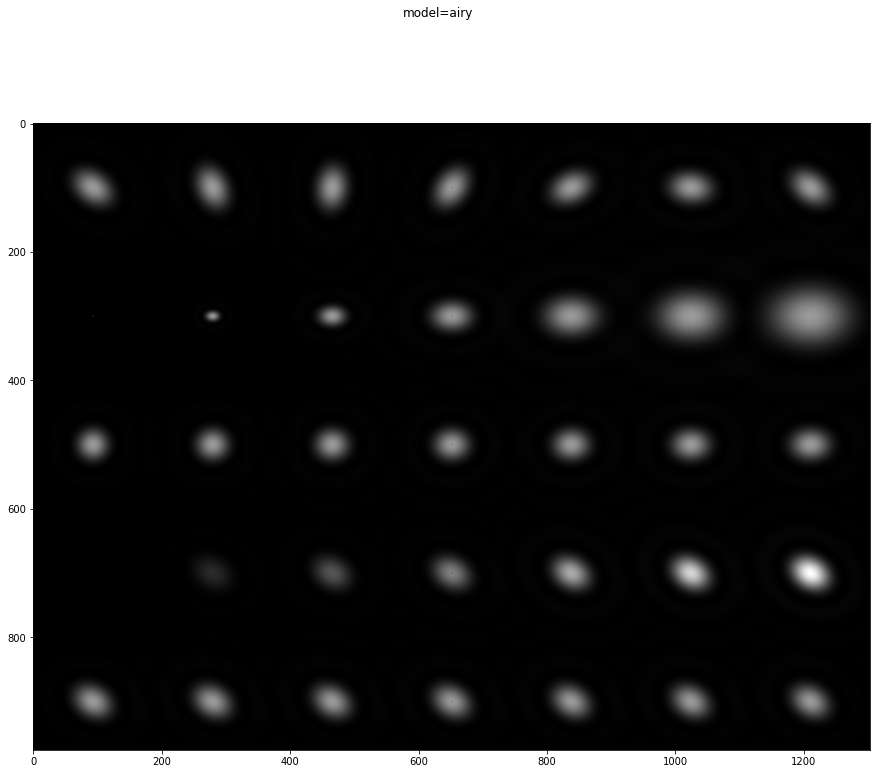

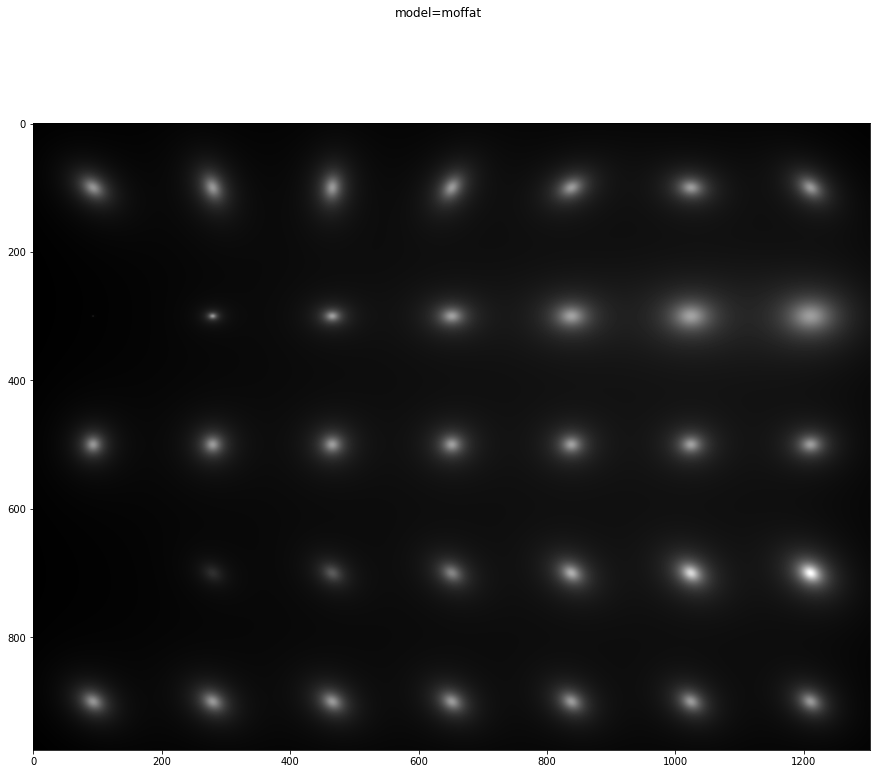

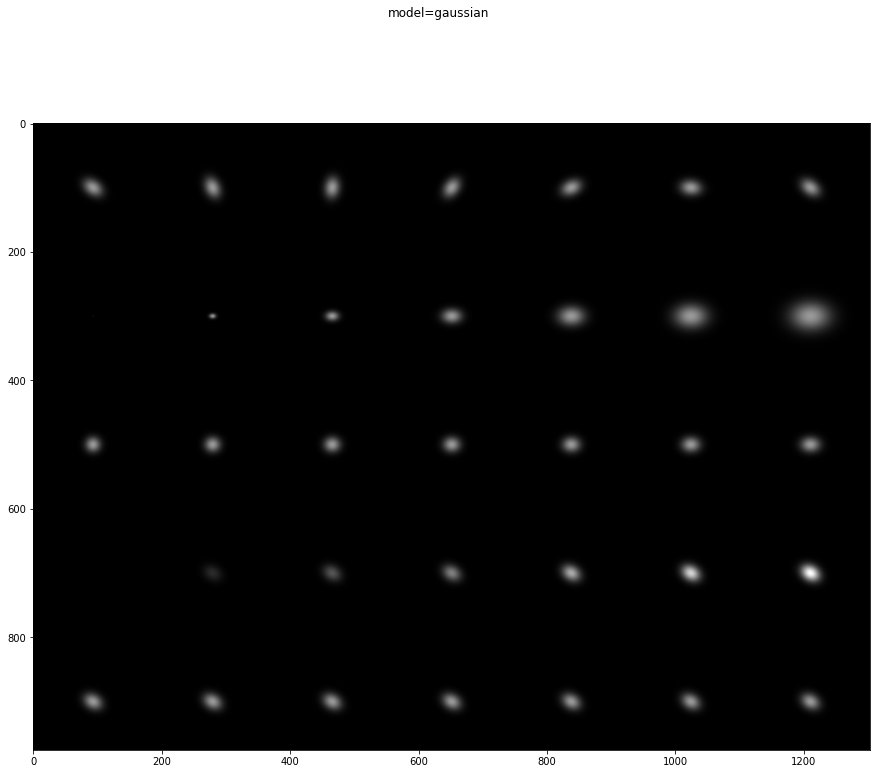

In [63]:
for model in ['airy', 'moffat', 'gaussian']:
    size_airy = 8.
    size_airy_ecc = 1.4
    intensity = .9
    gamma = 1.

    x_pos = 100

    templates = np.zeros((N_X, N_Y)) 

    N_scan = 7

    for i, theta in enumerate(np.linspace(np.pi*.2, 3*np.pi*.4, N_scan)):
        y_pos = N_Y/N_scan * (.5 + i) 
        templates += star(N_X, N_Y, x_pos, y_pos, size_airy, theta, size_airy_ecc, intensity, gamma, model)

    x_pos = 300
    theta = 0.
    for i, size_airy in enumerate(np.linspace(.1, 15, N_scan)):
        y_pos = N_Y/N_scan * (.5 + i) 
        templates += star(N_X, N_Y, x_pos, y_pos, size_airy, theta, size_airy_ecc, intensity, gamma, model)

    x_pos = 500
    theta = 0
    size_airy = 8.
    for i, size_airy_ecc in enumerate(np.linspace(1, 1.3, N_scan)):
        y_pos = N_Y/N_scan * (.5 + i) 
        templates += star(N_X, N_Y, x_pos, y_pos, size_airy, theta, size_airy_ecc, intensity, gamma, model)

    x_pos = 700
    theta = np.pi/6
    for i, intensity in enumerate(np.linspace(0, 1.5, N_scan)):
        y_pos = N_Y/N_scan * (.5 + i) 
        templates += star(N_X, N_Y, x_pos, y_pos, size_airy, theta, size_airy_ecc, intensity, gamma, model)

    x_pos = 900
    intensity = .9
    theta = np.pi/6
    for i, gamma in enumerate(np.linspace(0.5, 1.5, N_scan)):
        y_pos = N_Y/N_scan * (.5 + i) 
        templates += star(N_X, N_Y, x_pos, y_pos, size_airy, theta, size_airy_ecc, intensity, gamma, model)

    fig, ax = plt.subplots(figsize=(fig_width, fig_width/1.2))
    ax.imshow(templates)
    fig.suptitle('model='+model)
    plt.show()

In [64]:
N_X, N_Y = 1024, 1024
x_star = star(N_X, N_Y, N_X//2, N_Y//2, 1.5, 0, 1., .1, 1., 'moffat')

In [65]:
x_star[N_X//2, N_Y//2] = 1

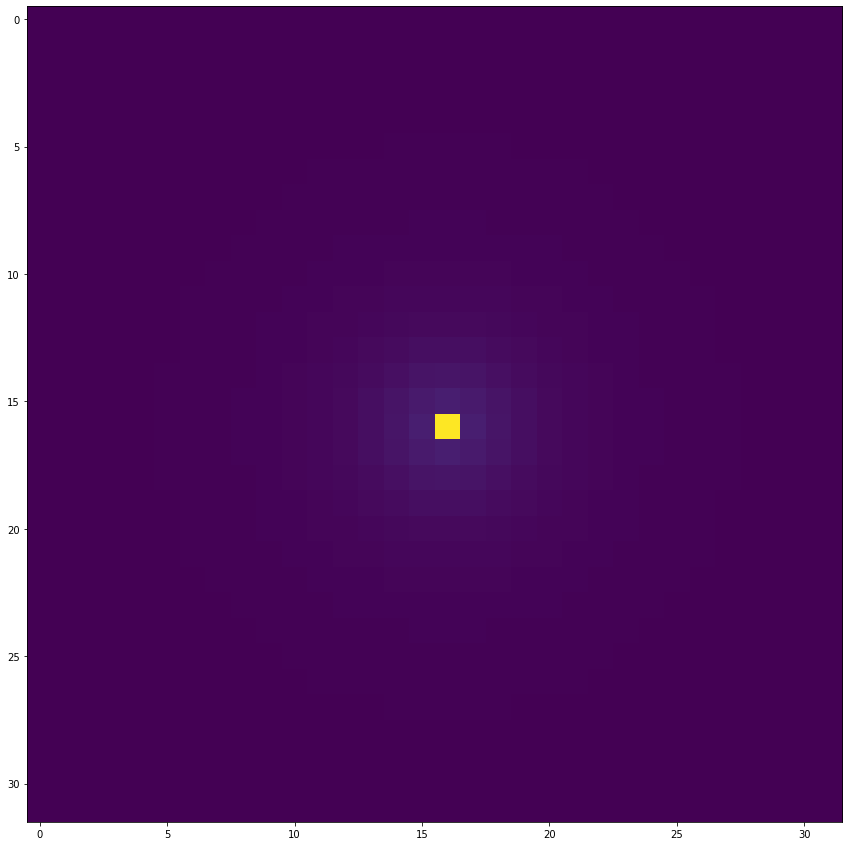

In [66]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(x_star[(N_X//2-16):(N_X//2+16), (N_Y//2-16):(N_Y//2+16)], cmap=plt.viridis());

In [67]:
#F_star = mc.envelope_color(fx, fy, ft, alpha=1)
#F_star /= np.abs(fx) + np.abs(fy) + 1.e-3
#F_star = F_star.squeeze()
#F_star[N_X//2, N_Y//2] = 0 # F_star.max()
#F_star /= np.sqrt((F_star**2).sum())
F_star = np.fft.fftn(x_star)
F_star = np.fft.fftshift(F_star)

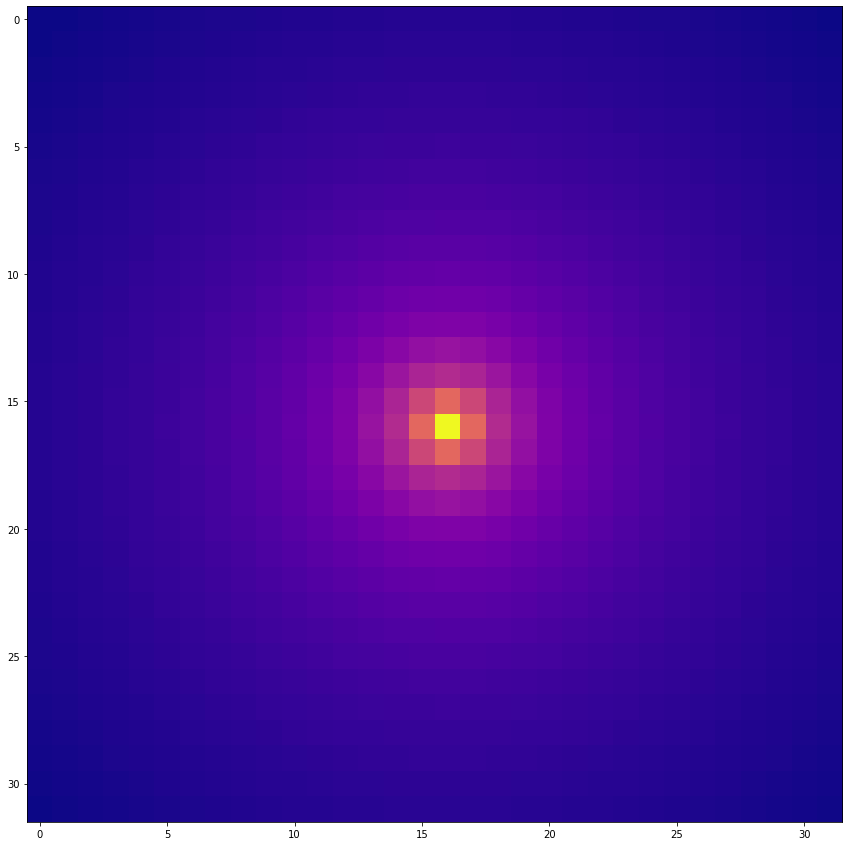

In [68]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(np.abs(F_star[(N_X//2-16):(N_X//2+16), (N_Y//2-16):(N_Y//2+16)]), cmap=plt.plasma());

## random cloud

We may now use a texture synthesis approach to generate the image *knowing  the right kernel*.



The description of this method was published in:

* Paula S. Leon, Ivo Vanzetta, Guillaume S. Masson, Laurent U. Perrinet. _Motion Clouds: Model-based stimulus synthesis of natural-like random textures for the study of motion perception._ [**Journal of Neurophysiology**](http://jn.physiology.org/content/early/2012/03/10/jn.00737.2011), 107(11):3217--3226, 2012  [URL](https://laurentperrinet.github.io/publication/sanz-12/) - [reprint](https://neuralensemble.github.io/MotionClouds/ms/MotionClouds.pdf) - [Supplementary Information](https://neuralensemble.github.io/MotionClouds/ms/MotionClouds_Supplementary.pdf) - [Supplementary Videos](https://neuralensemble.github.io/MotionClouds/ms/MotionClouds_VideoFigures.pdf)


* Jonathan Vacher, Andrew Isaac Meso, Laurent U Perrinet, Gabriel Peyré (2015). [Biologically Inspired Dynamic Textures for Probing Motion Perception.](https://laurentperrinet.github.io/publication/vacher-15-nips/) Advances in Neural Information Processing Systems (NeurIPS * 2015). 

* Jonathan Vacher, Andrew Isaac Meso, Laurent U Perrinet, Gabriel Peyré (2018). [Bayesian Modeling of Motion Perception using Dynamical Stochastic Textures.](https://laurentperrinet.github.io/publication/vacher-16/) Neural Computation. 


* for more documentation, visit the MotionClouds website @ https://neuralensemble.github.io/MotionClouds/


In [69]:
def random_cloud(envelope, events):
    (N_X, N_Y) = envelope.shape
    F_events = np.fft.fftn(events)
    F_events = np.fft.fftshift(F_events)
    
    Fz = F_events * envelope
    # de-centering the spectrum
    Fz = np.fft.ifftshift(Fz)
    #Fz[0, 0, 0] = 0. # removing the DC component
    z = np.fft.ifftn(Fz).real
    return z

In [40]:
#import MotionClouds as mc
#fx, fy, ft = mc.get_grids(N_X, N_Y, 1)

In [72]:
x = random_cloud(F_star, events=events)
#x = x.reshape((N_X, N_Y))
print(f'{x.min()=:.3f}, {np.median(x)=:.3f}, {x.mean()=:.3f}, {x.max()=:.3f}')
saturation = 1.
x = np.minimum(x, saturation)
print(f'{x.min()=:.3f}, {np.median(x)=:.3f}, {x.mean()=:.3f}, {x.max()=:.3f}')
print('x.shape=', x.shape)

x.min()=0.148, np.median(x)=0.166, x.mean()=0.172, x.max()=46.947
x.min()=0.148, np.median(x)=0.166, x.mean()=0.172, x.max()=1.000
x.shape= (1024, 1024)


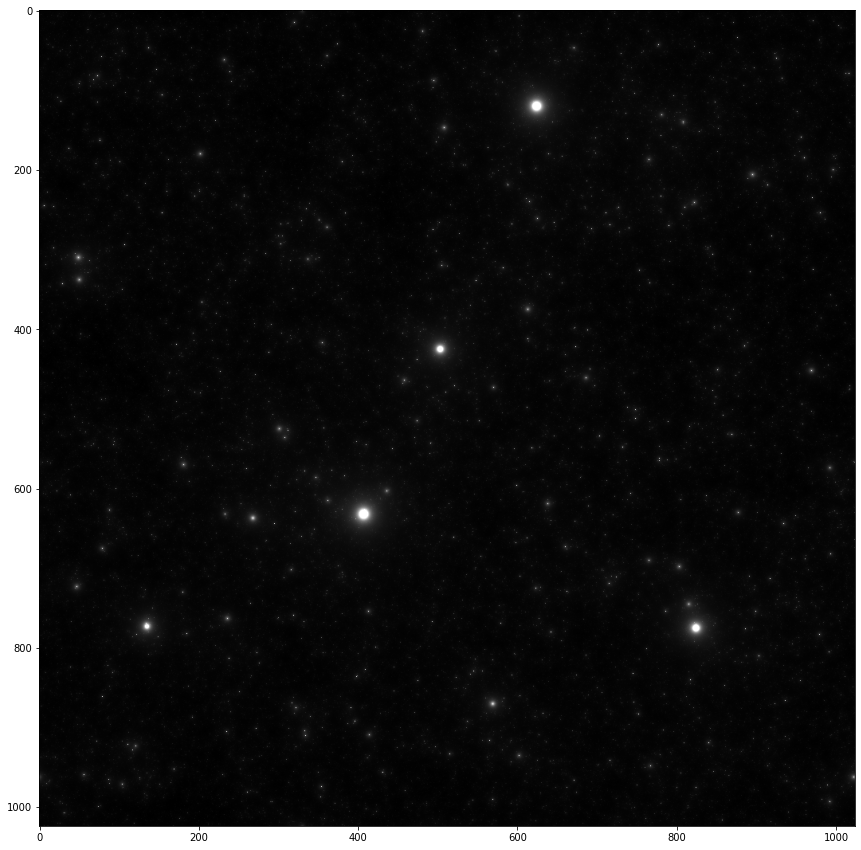

In [73]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(x, cmap=plt.gray(), vmin=x.min(), vmax=x.max());

All in one function:

In [74]:
def star_env(N_X, N_Y):
    x_star = star(N_X, N_Y, x_pos=N_X//2, y_pos=N_Y//2, 
                  size_airy=1.5, theta=0, size_airy_ecc=1., intensity=.2,
                gamma=1., model='moffat')
    F_star = np.fft.fftn(x_star)
    F_star = np.fft.fftshift(F_star)
    return F_star
F_star = star_env(N_X, N_Y)

In [75]:
%%timeit
F_star = star_env(1024, 1024)

122 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [178]:
def model(envelope, events, saturation=1., verbose=False):
    if verbose: print('envelope.shape = ', envelope.shape)
    if verbose: print('events.shape = ', events.shape)
    N_X, N_Y = envelope.shape[0], envelope.shape[1]
    x = random_cloud(envelope, events=events)
    #x = x.reshape((N_X, N_Y))
    if verbose: print(f'{x.min()=:.3f}, {np.median(x)=:.3f}, {x.mean()=:.3f}, {x.max()=:.3f}')
    if saturation < np.inf:
        x = np.minimum(x, saturation)
        if verbose: print(f'{x.min()=:.3f}, {np.median(x)=:.3f}, {x.mean()=:.3f}, {x.max()=:.3f}')
    if verbose: print('x.shape=', x.shape)
    return x

x = model(F_star, events, verbose=True)

envelope.shape =  (1024, 1024)
events.shape =  (1024, 1024)
x.min()=0.296, np.median(x)=0.328, x.mean()=0.337, x.max()=9.696
x.min()=0.296, np.median(x)=0.328, x.mean()=0.336, x.max()=1.000
x.shape= (1024, 1024)


In [179]:
%%timeit
model(F_star, events)

111 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [180]:
def generative_model(env, a=a, scale=scale, rho=0, seed=2021, saturation=np.inf, verbose=False):
    N_X, N_Y = env.shape
    if verbose: print('N_X, N_Y, N_frame = ', env.shape)
    np.random.seed(seed)
    events = scale*np.random.pareto(a=a, size=(N_X, N_Y))
    
    if rho>0:
        threshold = np.quantile(events.ravel(), 1-rho)
        events = events  * (events > threshold)

    x = model(env, events, saturation=saturation, verbose=verbose)
    return events, x
events, x = generative_model(F_star, verbose=True)

N_X, N_Y, N_frame =  (1024, 1024)
envelope.shape =  (1024, 1024)
events.shape =  (1024, 1024)
x.min()=0.296, np.median(x)=0.328, x.mean()=0.337, x.max()=9.696
x.shape= (1024, 1024)


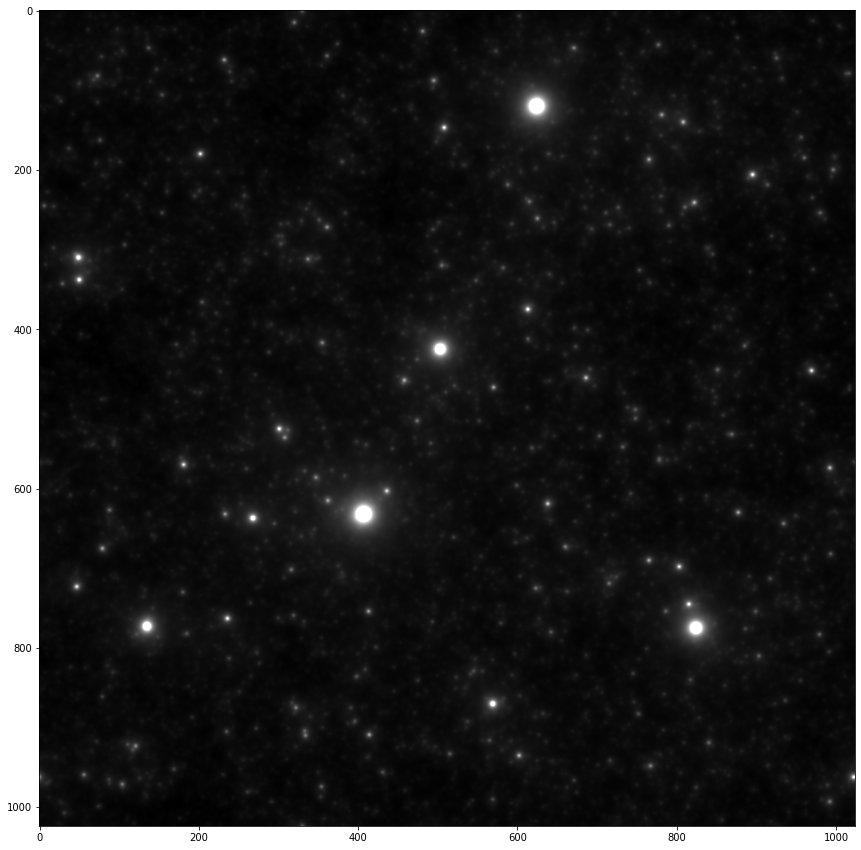

In [181]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow(x, cmap=plt.gray(), vmin=x.min(), vmax=1);

In [182]:
F_star = star_env(1024, 1024)

In [183]:
%%timeit
events, x = generative_model(F_star)

145 ms ± 7.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## adding colors

In [184]:
# Star colors 
#http://www.isthe.com/chongo/tech/astro/HR-temp-mass-table-byhrclass.html 
#http://www.vendian.org/mncharity/dir3/starcolor/
B5V = np.array([170., 191., 255.])
F2V = np.array([237., 238., 255.])
M2V = np.array([255., 190., 127.])
O = np.array([155., 176., 255.])
F = np.array([248., 247., 255.])
M = np.array([255., 204., 111.])

star_colors = np.vstack((B5V, F2V, M2V))
#star_colors = np.vstack((O, F, M))
star_colors /= 255.
# cols= R, G, B
star_colors

array([[0.666667, 0.74902 , 1.      ],
       [0.929412, 0.933333, 1.      ],
       [1.      , 0.745098, 0.498039]])

In [185]:
for color in star_colors:
    print('color', color)

color [0.666667 0.74902  1.      ]
color [0.929412 0.933333 1.      ]
color [1.       0.745098 0.498039]


In [192]:
def colorize(envelope, star_colors=star_colors, a=a, scale=scale, rho=0, saturation=np.inf, seed=2001, verbose=False):

    N_X, N_Y = envelope.shape[0], envelope.shape[1]    
    image = np.zeros((N_X, N_Y, 3))

    for i, color in enumerate(star_colors):
        np.random.seed(42 + seed + i)

        events = scale * np.random.pareto(a=a, size=(N_X, N_Y))
        if rho>0:
            threshold = np.quantile(events.ravel(), 1-rho)
            events = events  * (events > threshold)
        
        x = model(envelope, events, saturation=np.inf, verbose=False)
        
        image += x[:, :, None] * color[None, None, :] / star_colors.shape[0]
        
    if verbose: print(f'{image.min()=:.3f}, {np.median(image)=:.3f}, {image.mean()=:.3f}, {image.max()=:.3f}')
    if saturation < np.inf:
        image = np.minimum(image, saturation)
        if verbose: print(f'{image.min()=:.3f}, {np.median(image)=:.3f}, {image.mean()=:.3f}, {image.max()=:.3f}')
    return image
image = colorize(F_star, saturation=1, verbose=True)

image.min()=0.242, np.median(image)=0.269, image.mean()=0.271, image.max()=2.212
image.min()=0.242, np.median(image)=0.269, image.mean()=0.271, image.max()=1.000


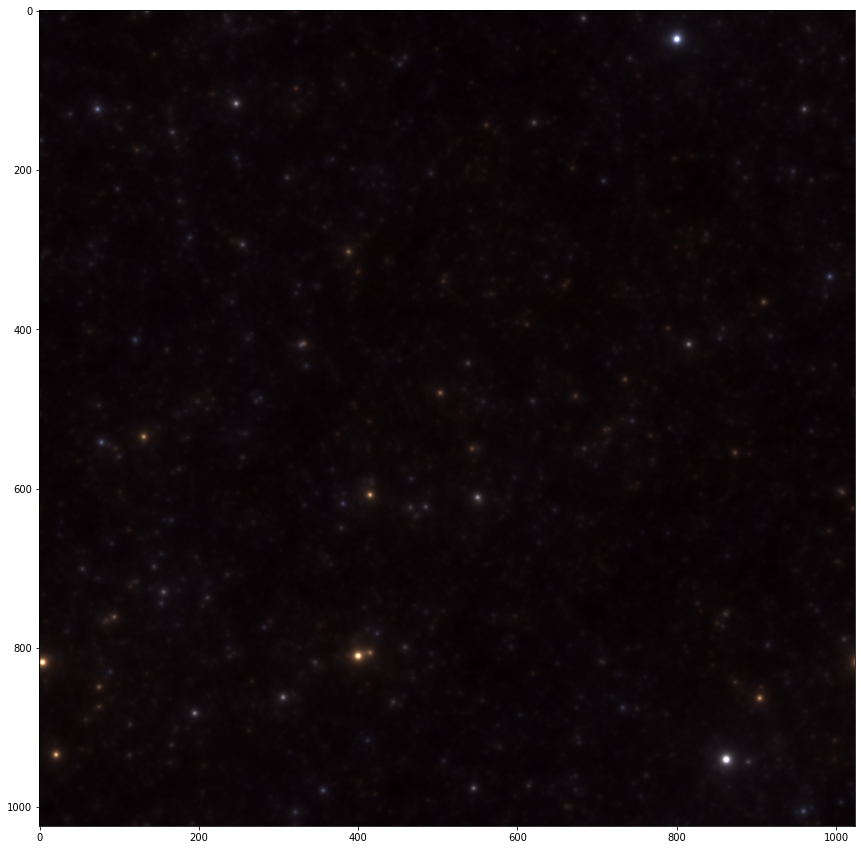

In [193]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.imshow((image-image.min())/(image.max()-image.min()));

Nice idea... but I do not know the proportion for the colors for stars, so this would need to be tuned...

In [188]:
F_star = star_env(1024, 1024)

In [189]:
%%timeit
x = colorize(F_star)

739 ms ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## noise and sensor saturation

Astronomy images are often processed and such image can be converted to a [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude#Calculations) or https://clarkvision.com/articles/astrophotography.image.processing/ (generalised gamma function), but we will ignore this here.

In [146]:
def sensor_gamma(image, gamma):
    if gamma==1.:
        return image
    elif gamma>0:
        image_sgn = np.sign(image)
        image =  image_sgn * np.abs(image)**gamma
        return image
    else:
        return 'bummer'

Let's add some sensor noise with white exponential noise :

In [147]:
F_star = star_env(N_X, N_Y)
events, x = generative_model(F_star, saturation=np.inf, verbose=True)
x[x<0] = 0
noise = .002
saturation = 1. #np.inf
x_noise = np.minimum(x + noise * np.random.exponential(size=x.shape), saturation)

N_X, N_Y, N_frame =  (1024, 1024)
envelope.shape =  (1024, 1024)
events.shape =  (1024, 1024)
x.min()=0.296, np.median(x)=0.328, x.mean()=0.337, x.max()=9.696
x.min()=0.296, np.median(x)=0.328, x.mean()=0.337, x.max()=9.696
x.shape= (1024, 1024)


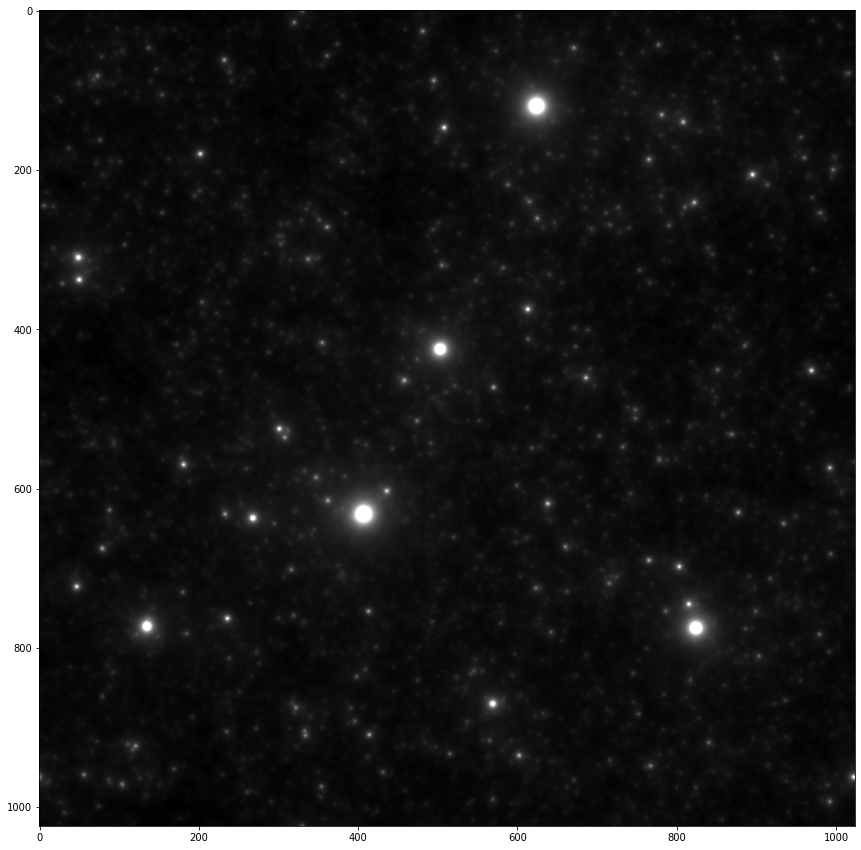

In [148]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
vmax = np.absolute(x_noise).max()
ax.imshow(x_noise, cmap=plt.gray(), vmin=x_noise.min(), vmax=1);

Note that the size of the stars is not given by its actual physical size but by luminance. However, these two factors are *in theory* correlated (the closer the brighter) - but *in practice* the apparent dimension of a star will be less than that of a pixel on your sensor. Twinkle, twinkle little star...

# one more thing...

Let's put the quantitative and qualitative results together:

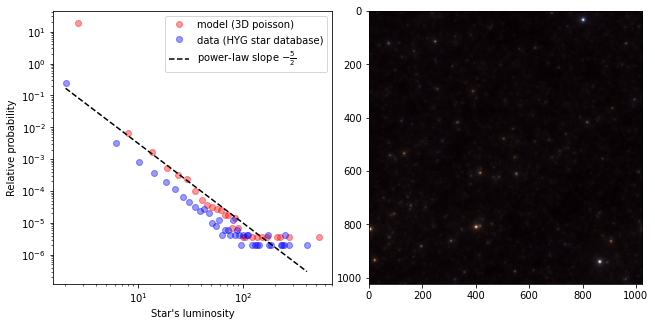

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(fig_width/1.618, fig_width/1.618/2))

ax = axs[0]
# model
hist, bin_edges = np.histogram(1e-1/(d[ind_ball]+1e-2)**2, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, 100*hist, 'o', c='r', label='model (3D poisson)', alpha=.4)
# data
hist, bin_edges = np.histogram(space['lum'][1:]*1e-6, bins=100, density=True)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
ax.plot(bin_centers, hist, 'o', c='b', label='data (HYG star database)', alpha=.4)
# fit
ax.plot(bin_centers, bin_centers**(-5/2), '--', c='k', label=r'power-law slope $-\frac{5}{2}$', alpha=1.)
ax.set_xlabel("Star's luminosity")
ax.set_ylabel('Relative probability');
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')
plt.tight_layout();

ax = axs[1]
#vmax = np.absolute(x_noise).max()
#ax.imshow(x_noise, cmap=plt.gray(), vmin=x_noise.min(), vmax=1);
image = colorize(F_star, saturation=1, verbose=False)
ax.imshow((image-image.min())/(image.max()-image.min()));

In [204]:
fig.savefig('../files/2021-03-27_generative.png', dpi=300)

## todo: movie of the fractal

## some book keeping for the notebook

In [59]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,SLIP,LogGabor,SparseEdges,matplotlib,scipy,pillow,imageio  -r -g -b

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.19.0

numpy      : 1.20.2
SLIP       : not installed
LogGabor   : not installed
SparseEdges: not installed
matplotlib : 3.3.3
scipy      : 1.6.0
pillow     : not installed
imageio    : 2.9.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: ekla

Git hash: 708ba5384ce2261f4afe34833dd87918932809ef

Git repo: https://github.com/laurentperrinet/sciblog.git

Git branch: master

